# Telecom Churn Case Study

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
data = pd.read_csv('train.csv', header=0)
test_df = pd.read_csv('test.csv', header=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Step 1: Data understanding and Preprocessing


In [3]:
# shape of dataset
print("Training Dataset Shape: ",data.shape)
print("Test Dataset Shape: ",test_df.shape)

Training Dataset Shape:  (69999, 172)
Test Dataset Shape:  (30000, 171)


In [4]:
# data sample
data.sample(4)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
53578,53578,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,386.913,98.263,0.000,0.00,0.00,NaN,415.43,28.58,NaN,16.23,0.0,NaN,3.71,28.58,NaN,0.00,0.00,NaN,4.54,0.00,NaN,0.0,0.00,NaN,0.00,0.0,NaN,4.54,0.00,NaN,0.00,0.00,NaN,342.49,0.00,NaN,64.66,0.0,NaN,0.0,0.0,NaN,407.16,0.00,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,411.71,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,466.49,0.00,NaN,0.0,0.00,NaN,0.0,0.0,NaN,466.49,0.00,NaN,466.49,0.00,0.00,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,3,3,1,250,100,0,200,100,0,6/12/2014,7/17/2014,8/8/2014,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,493,0.00,0.00,0.00,1
11220,11220,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,873.274,816.128,714.454,12.83,14.54,7.63,805.58,750.46,661.41,0.00,0.0,0.0,0.00,0.00,0.0,10.46,13.29,4.64,130.89,27.38,31.29,0.0,0.00,0.00,0.00,0.0,0.0,141.36,40.68,35.94,2.36,1.25,2.98,674.68,723.08,630.11,0.00,0.0,0.0,0.0,0.0,0.0,677.04,724.33,633.09,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,818.41,765.01,669.04,24.21,10.56,4.43,52.51,31.51,20.01,0.00,0.00,0.00,76.73,42.08,24.44,0.00,0.00,0.00,46.29,0.00,7.73,0.0,0.00,0.00,0.0,0.0,0.0,46.29,0.00,7.73,123.08,42.08,32.18,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.0,0.0,49,47,44,1000,940,810,30,50,30,6/30/2014,7/31/2014,8/31/2014,20,50,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
data.dtypes

id                            int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            

In [6]:
# let's divide the dataframe based on feature dtype for better understanding
cat_col = data.select_dtypes(include=['object'])
num_col = data.select_dtypes(include=['int64', 'float64'])

num_col = num_col.drop('churn_probability', axis=1)
print(cat_col.shape, num_col.shape)

(69999, 9) (69999, 162)


> Categorical features

In [7]:
cat_col.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [8]:
exclude_col_cat = []
for col in cat_col.columns:
    if len(data[col].unique()) < 3:
        exclude_col_cat.append(col)
        print(col, data[col].unique())
cat_col = cat_col.drop(exclude_col_cat, axis=1)

data.drop(exclude_col_cat, axis=1, inplace=True)
test_df.drop(exclude_col_cat, axis=1, inplace=True)

last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]


 As we see that all the ``cat_col`` need to type cast into ``date dtype``.

In [9]:

for col in cat_col.columns:
    cat_col[col] = pd.to_datetime(cat_col[col], format='%m/%d/%Y')
    test_df[col] = pd.to_datetime(test_df[col], format='%m/%d/%Y')
data[cat_col.columns] = cat_col

In [10]:
cat_col.dtypes

date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
dtype: object

> Numerical feature

In [11]:
num_col.columns[:40]

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7'],
      dtype='object')

In [12]:
exclude_col = []
for col in num_col.columns:
    if len(data[col].unique()) < 3:
        exclude_col.append(col)
        print(col, data[col].unique())

data.drop(exclude_col[1:], axis=1, inplace=True)
test_df.drop(exclude_col[1:], axis=1, inplace=True)

circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
std_og_t2c_mou_6 [ 0. nan]
std_og_t2c_mou_7 [ 0. nan]
std_og_t2c_mou_8 [ 0. nan]
std_ic_t2o_mou_6 [ 0. nan]
std_ic_t2o_mou_7 [ 0. nan]
std_ic_t2o_mou_8 [ 0. nan]


In [13]:
num_col = data.select_dtypes(include=['int64', 'float64'])

In [14]:
num_col.columns.shape

(154,)

In [15]:
num_col.describe()

,id,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.0000

In [16]:
# check the null counts(in %)
null_counts = data.isnull().sum()
null_df = pd.DataFrame({'Feature': null_counts.index, 'null_count':null_counts.values*100/data.shape[0]}).sort_values(by='null_count', ascending=False)


In [17]:
null_df[(null_df['null_count']>50)]

,Feature,null_count
131,arpu_3g_6,74.902499
119,count_rech_3g_6,74.902499
134,arpu_2g_6,74.902499
152,fb_user_6,74.902499
137,night_pck_user_6,74.902499
107,date_of_last_rech_data_6,74.902499
110,total_rech_data_6,74.902499
113,max_rech_data_6,74.902499
122,av_rech_amt_data_6,74.902499
116,count_rech_2g_6,74.902499


In [18]:
# let's drop this columns which has greater than 50% missing values.
data.drop(null_df[(null_df['null_count']>50)].Feature, axis=1, inplace=True)
test_df.drop(null_df[(null_df['null_count']>50)].Feature, axis=1, inplace=True)

In [19]:
# recheck the null counts(in %)

null_counts = data.isnull().sum()
null_df = pd.DataFrame({'Feature': null_counts.index, 'null_count':null_counts.values*100/data.shape[0]}).sort_values(by='null_count', ascending=False)

null_df = null_df[(null_df['null_count']>0)]
null_df.sample(5)

,Feature,null_count
68,std_ic_t2t_mou_6,3.954342
17,loc_og_t2t_mou_6,3.954342
48,spl_og_mou_7,3.838626
34,std_og_t2t_mou_8,5.290076
46,isd_og_mou_8,5.290076


In [20]:
# let's impute this value with zero as we assume that these customer doesn't make any use of std/loc_ic calls.
for col in null_df['Feature'][:-3]:
    data[col] = data[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

In [21]:
# we are going to drop date columns which are not part of our model building
date_col = data.select_dtypes(include=['datetime64[ns]'])
data.drop(date_col.columns, axis=1, inplace=True)
test_df.drop(date_col.columns, axis=1, inplace=True)

print(data.shape,test_df.shape)

(69999, 127) (30000, 126)


## Step 2: Exploratory Data Analysis (EDA)

#### 1. Univariate Analysis

> I. Numerical Features

In [22]:
num_col.columns

Index(['id', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=154)

<AxesSubplot: xlabel='aon', ylabel='Count'>

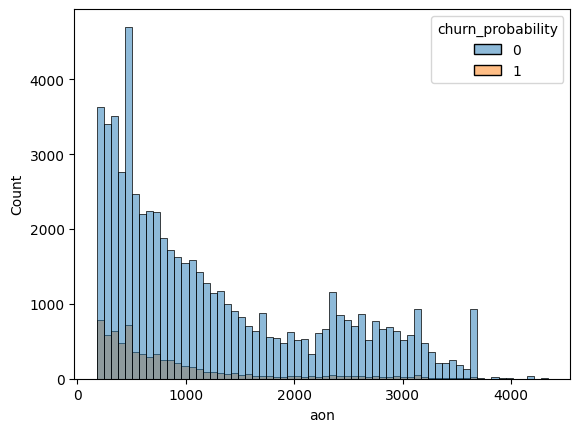

In [23]:
sns.histplot(x=data['aon'], hue=data.churn_probability)

##### <font color='lawngreen'>Finding/Insight</font> : There is high percentage of ``Churning`` of Customer with less than ``1-2 yr tenure.``

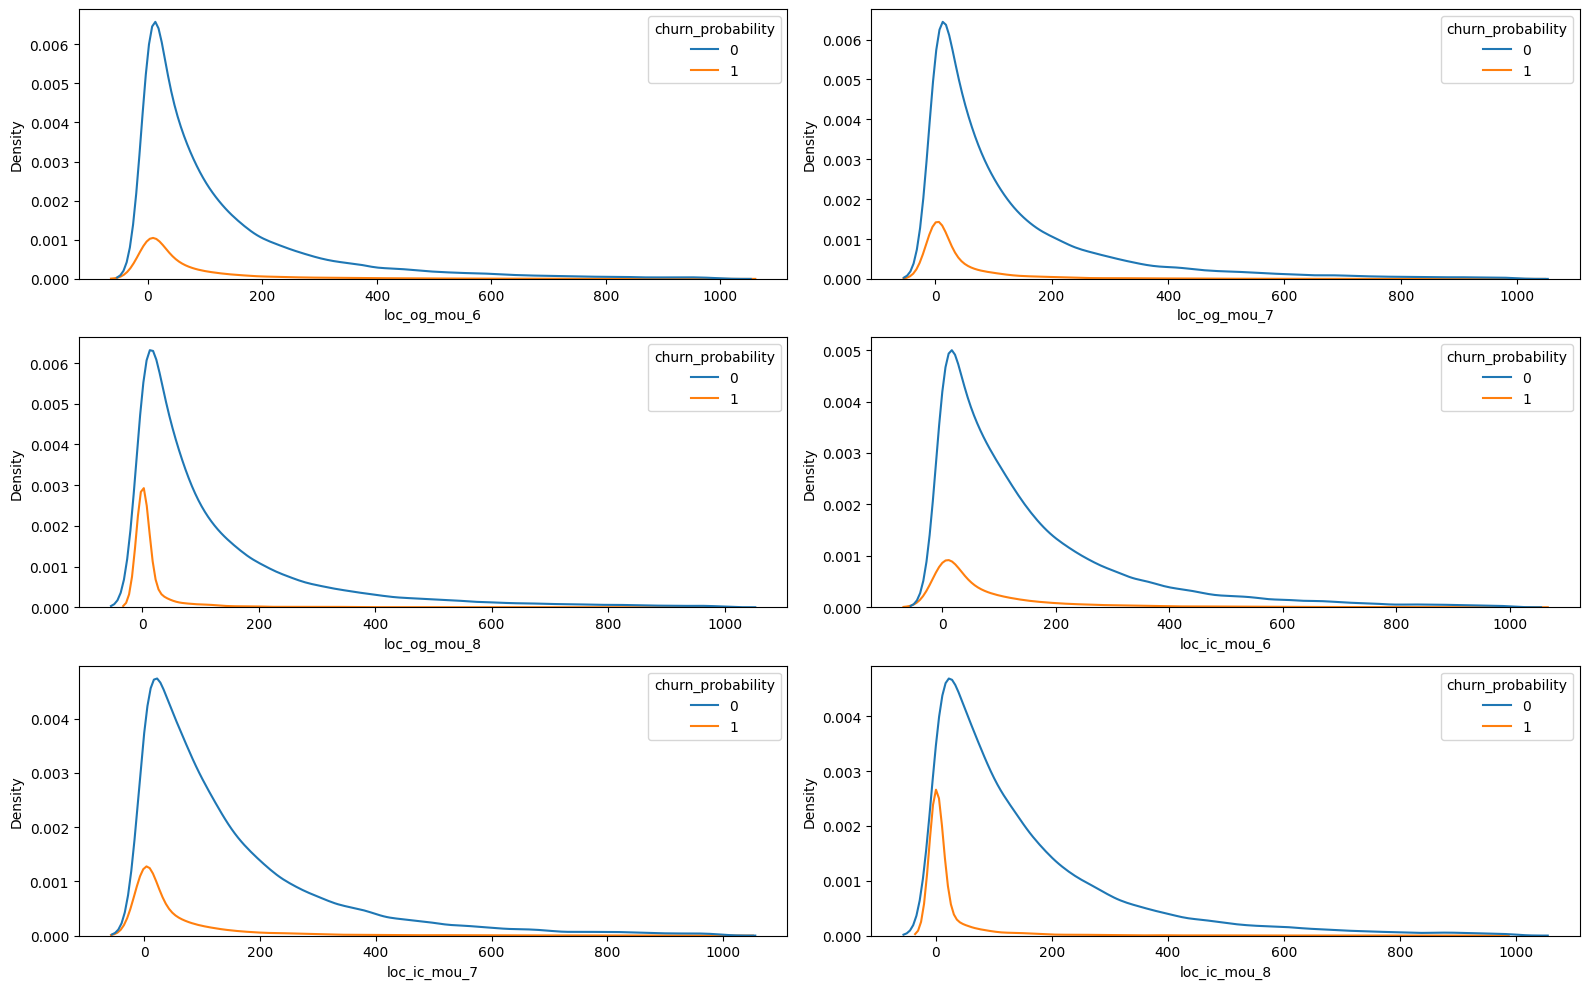

In [24]:
# loc_ic/og calls columns
loc_ic_og = [ 'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']

cols = 2
rows = 3
fig = plt.figure(figsize= (16,10))
for i, col in enumerate(loc_ic_og):
    
    ax=fig.add_subplot(rows, cols, i+1)

    sns.kdeplot(x=data[data[col] <=1000][col], hue=data.churn_probability)
  
fig.tight_layout()  
plt.show()


##### <font color='lawngreen'>Finding/Insight</font> : As we see that, customer who doesn't make any calls from month of ``Jun`` the percentage of Churn increase gradually.

<AxesSubplot: xlabel='Feature', ylabel='No Rech done'>

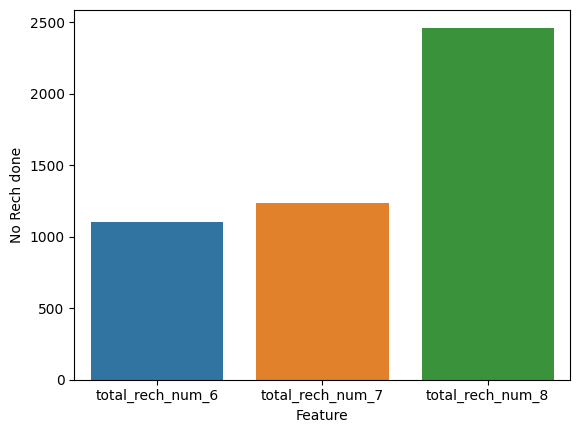

In [25]:
num_rch_cols__ = [col for col in data.columns if 'num' in col]

num_rch_df = pd.DataFrame({'Feature': num_rch_cols__, 'No Rech done':[len(data[data[col] == 0][col]) for col in num_rch_cols__]})

sns.barplot(x=num_rch_df['Feature'], y=num_rch_df['No Rech done'])

##### <font color='lawngreen'>Finding/Insight</font> : From above bar chart we can say that number of ``Churn`` customer increases who has not done any ``Recharge(zero) since month_jun.`` 

<AxesSubplot: xlabel='loc_og_t2t_mou_8'>

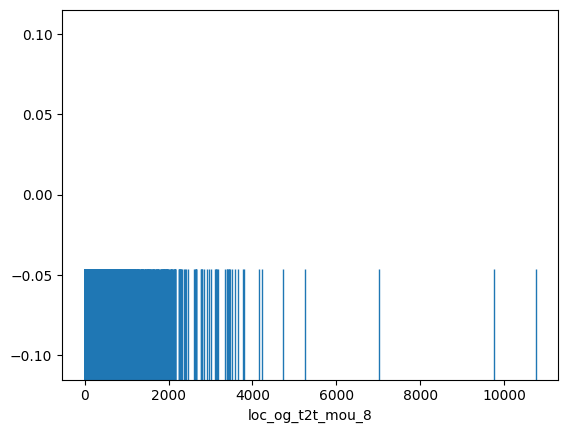

In [26]:
sns.rugplot(x=data['loc_og_t2t_mou_8'], height=0.3)

Outgoing/incomming local/std calls minute are commulated in the range of ``0-2500``.

<AxesSubplot: ylabel='arpu_8'>

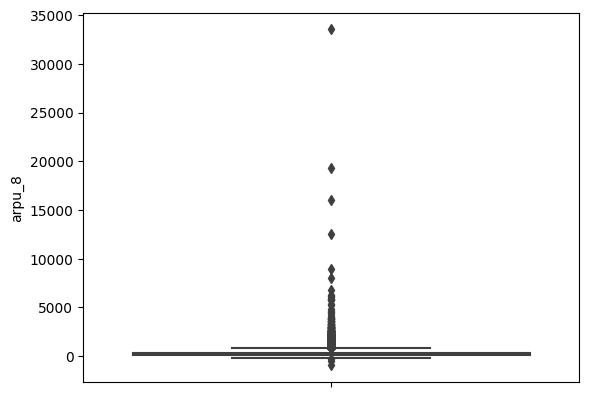

In [27]:
sns.boxplot(y=data['arpu_8'])


Most of data is widely spreads 

> categorical Features

<AxesSubplot: xlabel='churn_probability', ylabel='count'>

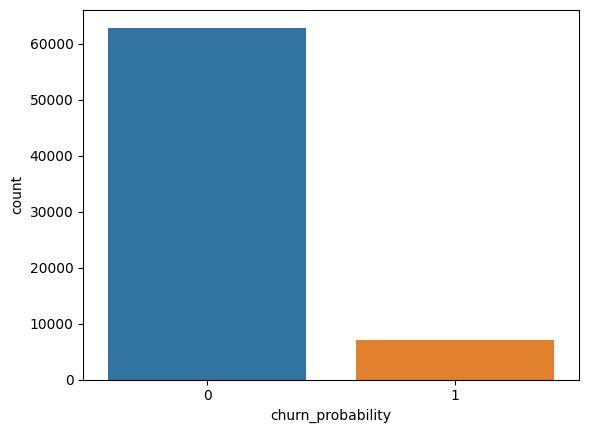

In [29]:
sns.countplot(x=data['churn_probability'])

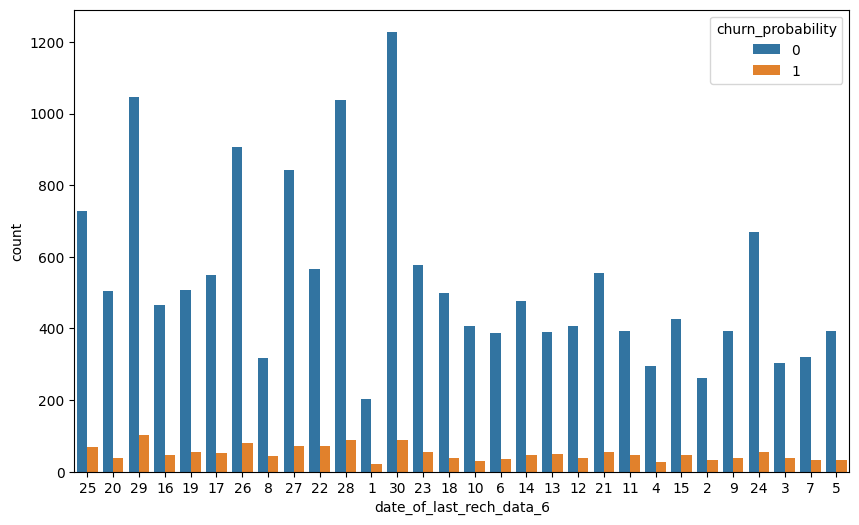

In [30]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=cat_col['date_of_last_rech_data_6'], hue=data['churn_probability'])
xl = [ pd.to_datetime(i.get_text()).day  for i in ax.get_xticklabels()]
ax.set_xticklabels(xl)
plt.show()

In [31]:
cat_col.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

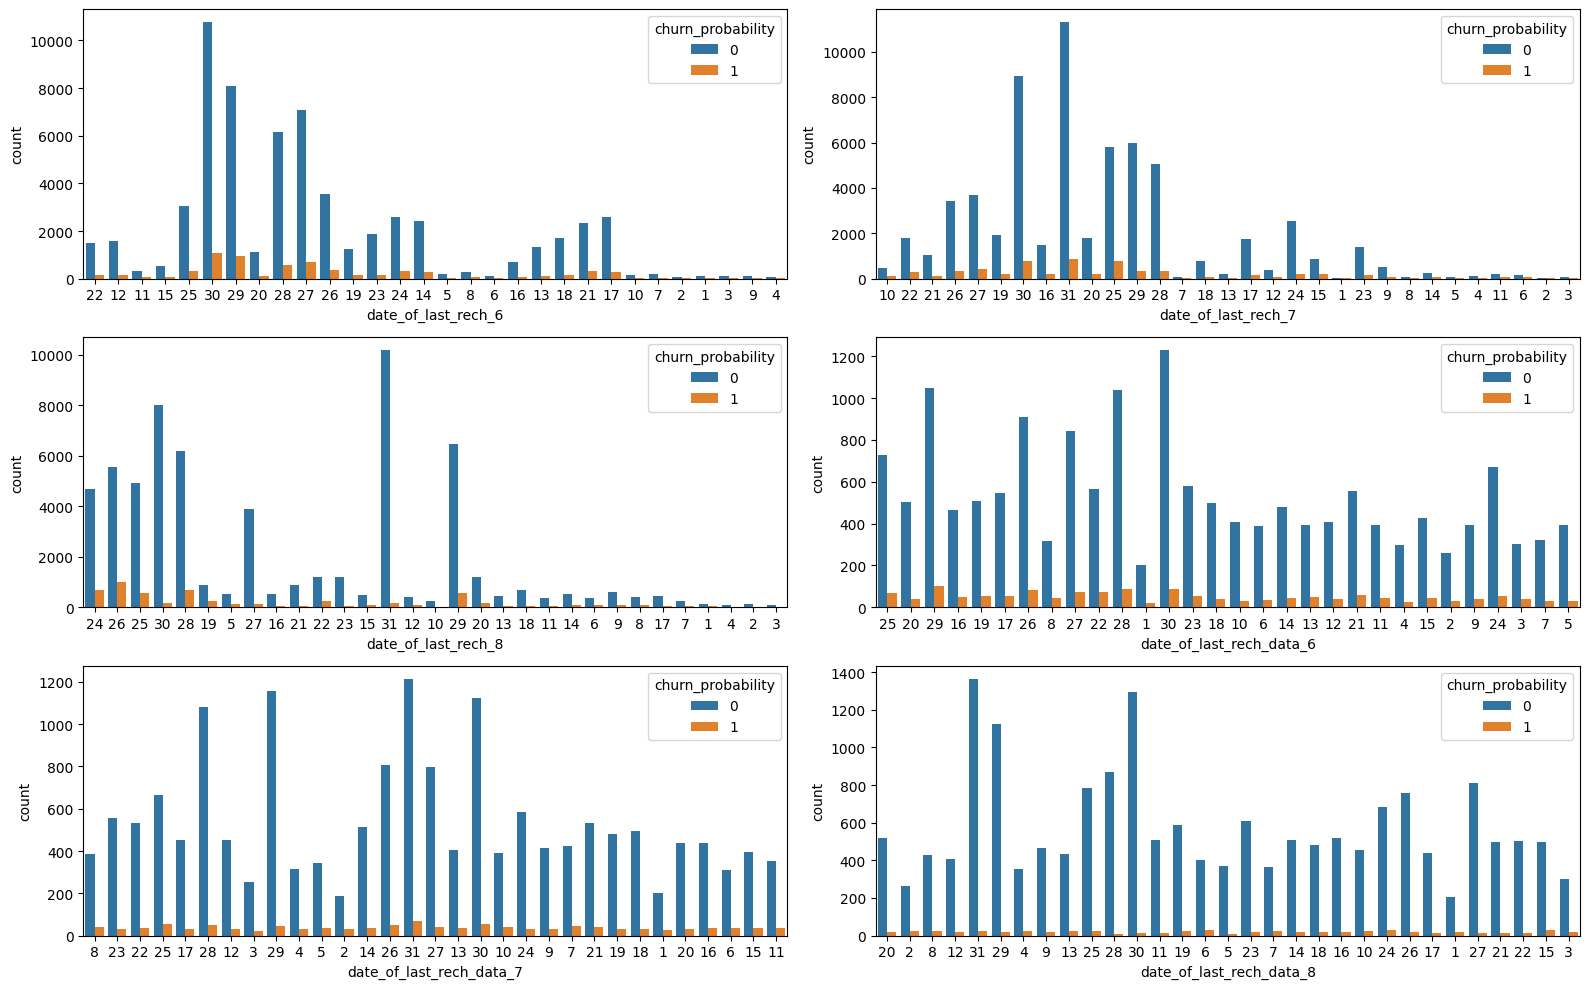

In [32]:
cols = 2
rows = 3
fig = plt.figure(figsize= (16,10))
for i, col in enumerate(cat_col.columns):
    
    ax=fig.add_subplot(rows, cols, i+1)
    c_plot = sns.countplot(x=cat_col[col], hue=data['churn_probability'])
    xl = [ pd.to_datetime(i.get_text()).day  for i in c_plot.get_xticklabels()]
    c_plot.set_xticklabels(xl)
    # plt.xticks(rotation=45, ha='right')
  
fig.tight_layout()  
plt.show()

In [33]:
num_col.columns

Index(['id', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=154)

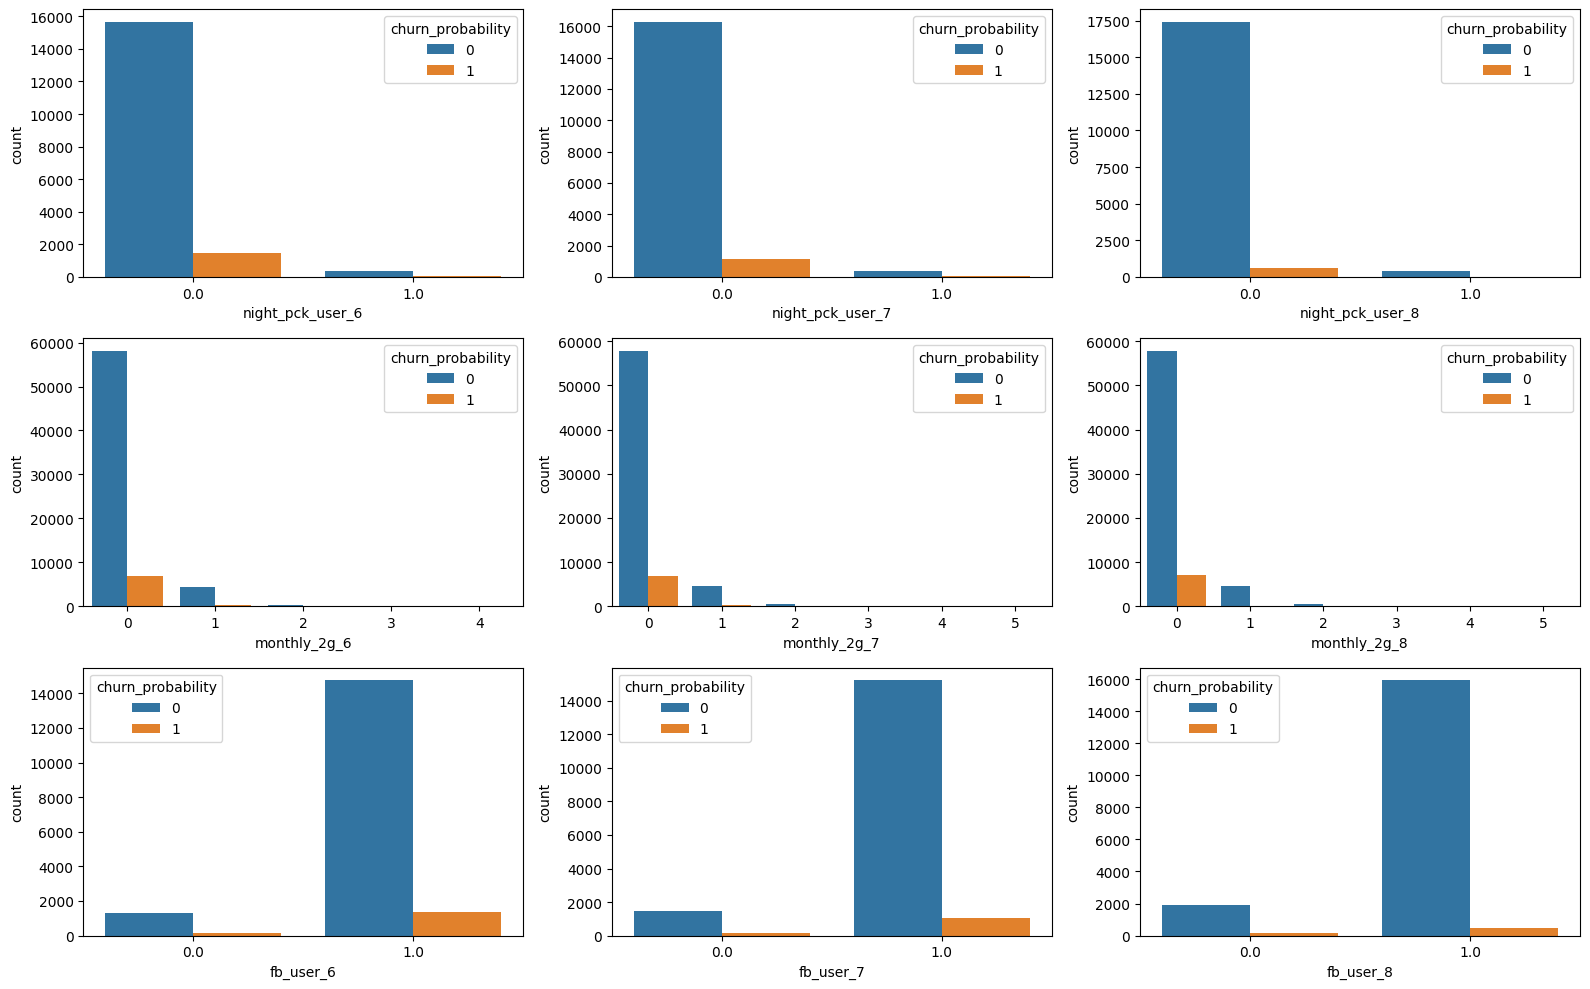

In [34]:
cols = 3
rows = 3
fig = plt.figure(figsize= (16,10))
for i, col in enumerate(num_col.columns[num_col.nunique()<=9][1:-1]):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=num_col[col], ax=ax, hue=data['churn_probability'])
    
    # plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()



#### 2. Bivariate/ Multivariate Analysis

> Numerical vs Numerical

<AxesSubplot: xlabel='total_rech_num_7', ylabel='arpu_7'>

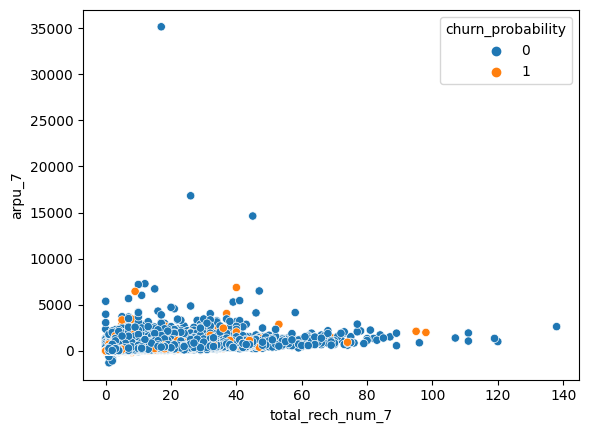

In [35]:
sns.scatterplot(x=data['total_rech_num_7'],y=data['arpu_7'], hue=data.churn_probability)

<AxesSubplot: xlabel='total_rech_num_8', ylabel='arpu_8'>

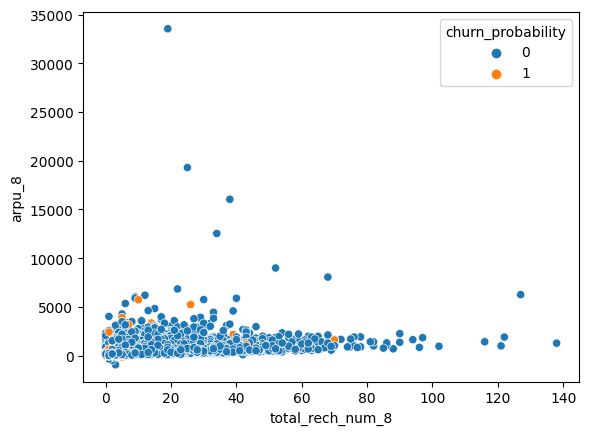

In [36]:

sns.scatterplot(x=data['total_rech_num_8'], y=data['arpu_8'], hue=data.churn_probability)

In [37]:
pair_plot_col =[]
for col in data.columns[1:]:
    if data[col].nunique() > 500:
        pair_plot_col.append(col)
len(pair_plot_col)

98

In [38]:
# sns.pairplot(data=data[pair_plot_col[:25]])

## Step 3: Feature Engineering

In [39]:
arpu_cols = [col for col in data.columns if 'arpu' in col]
data[arpu_cols].head(3)

,arpu_6,arpu_7,arpu_8
0,31.277,87.009,7.527
1,0.000,122.787,42.953
2,60.806,103.176,0.000


In [40]:
# let's derive the new column total_arpu
total_arpu = data['arpu_6']+data['arpu_7']+data['arpu_8']
data['total_arpu']= total_arpu
total_arpu_test = test_df['arpu_6']+test_df['arpu_7']+test_df['arpu_8']
test_df['total_arpu']= total_arpu_test

# drop the arpu_* columns
data.drop(arpu_cols, axis=1, inplace=True)
test_df.drop(arpu_cols, axis=1, inplace=True)

In [41]:
amt_cols = [col for col in data.columns if 'amt' in col]
data[amt_cols].head(3)

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
0,77,65,10,65,65,10,65,65,0
1,0,145,50,0,145,50,0,0,0
2,70,120,0,70,70,0,70,50,0


In [42]:
num_rch_cols = [col for col in data.columns if 'num' in col]
data[num_rch_cols].head(3)



,total_rech_num_6,total_rech_num_7,total_rech_num_8
0,3,2,2
1,3,4,5
2,2,4,2


In [43]:
total_num_rch = data['total_rech_num_6'] + data['total_rech_num_7']+data['total_rech_num_8']
total_num_rch_test = test_df['total_rech_num_6'] + test_df['total_rech_num_7']+test_df['total_rech_num_8']

data['num_rch_cols']= total_num_rch
test_df['num_rch_cols']= total_num_rch_test

# drop the arpu_* columns
data.drop(num_rch_cols, axis=1, inplace=True)
test_df.drop(num_rch_cols, axis=1, inplace=True)

In [44]:
data.shape, test_df.shape

((69999, 123), (30000, 122))

In [45]:
# plt.figure(figsize=(12,10))
# sns.histplot(x=data['aon'], y=num_rch_cols, hue=data.churn_probability)
# sns.scatterplot(x=data['aon'], y=total_num_rch, hue=data.churn_probability)

In [46]:
# drop the 'id' and 'circle_id' columns as they don't add any value
data.drop(['id', 'circle_id'], axis=1, inplace=True)

In [47]:
print("final dataset shape:", data.shape)

final dataset shape: (69999, 121)


#### Rescaling the data

In [48]:
# assign X,y value
X_data = data.drop('churn_probability', axis=1)
y_data = data['churn_probability']

X_test_sample = test_df.drop(['id','circle_id'], axis=1)

In [49]:
#  instatiate scaler object
scaler = StandardScaler()

X_data_scaled = scaler.fit_transform(X_data)

# convert into Dataframe
X_data_scaled = pd.DataFrame(X_data_scaled, columns=X_data.columns)

In [50]:
# sample data scaling
X_test_sample_scaled = scaler.transform(X_test_sample)
# convert into Dataframe
X_test_sample_scaled = pd.DataFrame(X_test_sample_scaled, columns=X_test_sample.columns)

In [51]:
# Train-test split on scaled dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled,y_data, random_state=42,stratify=y_data, train_size=0.8)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 120), (14000, 120), (55999,), (14000,))

In [53]:
X_train.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_arpu,num_rch_cols
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,-0.001680,-0.002511,-0.002482,0.001313,-0.000679,-0.000055,0.000805,-0.001505,-0.001888,-0.001602,-0.000714,0.000215,0.000138,-0.001176,-0.001457,-0.000169,-0.000097,-0.000842,-0.002234,0.000965,-0.000863,-0.000874,-0.003874,-0.000769,-0.000144,-0.000743,-0.001478,-0.001840,-0.002098,-0.002125,0.002154,-0.000587,0.000510,-0.000286,-0.001266,-0.001809,0.000202,-0.001774,-0.001077,0.001604,0.000505,0.000931,-0.003705,-0.002883,-0.001895,0.001629,0.001628,0.001789,0.000083,-0.001963,-0.001654,0.000909,0.000614,-0.000116,-0.000899,-0.001464,-0.001378,-0.000329,-0.000100,-0.000464,-0.000148,-0.000613,-0.001054,0.001842,0.003970,0.003391,-0.001319,0.002919,0.003558,0.000793,0.001430,0.000580,0

#### Perform PCA

- step 1: Instantiate PCA object 
- step 2: Evaluate amount of varience explain by each component
- step 3: Scree Plots 
- step 4: Dimentationality Reduction

In [54]:
# Step 1
pca = PCA(random_state=42)

# fit the model
pca.fit(X_train)

PCA(random_state=42)

In [55]:
# step 2
pca.explained_variance_ratio_

array([1.27259757e-01, 7.61340469e-02, 5.35399632e-02, 4.92426747e-02,
       3.64612142e-02, 3.22527910e-02, 3.12746526e-02, 2.79980405e-02,
       2.55081844e-02, 2.41785692e-02, 2.35955230e-02, 2.20205979e-02,
       2.14296969e-02, 2.05270357e-02, 1.98205413e-02, 1.81071749e-02,
       1.72513761e-02, 1.57280264e-02, 1.53858038e-02, 1.44699035e-02,
       1.42081752e-02, 1.35013230e-02, 1.26478006e-02, 1.03327458e-02,
       1.00528474e-02, 9.99415127e-03, 9.93153054e-03, 9.78049138e-03,
       9.64485747e-03, 8.61985452e-03, 7.68264286e-03, 7.35459440e-03,
       7.26305055e-03, 7.22269317e-03, 7.02634160e-03, 6.78047676e-03,
       6.74558356e-03, 6.64724017e-03, 6.53036330e-03, 5.85251906e-03,
       5.65394725e-03, 5.47062940e-03, 5.23627540e-03, 5.09677897e-03,
       4.72772391e-03, 4.54098456e-03, 4.49167037e-03, 4.44511304e-03,
       4.33236872e-03, 4.23173315e-03, 4.13213497e-03, 4.04385056e-03,
       3.95847577e-03, 3.88516228e-03, 3.68797211e-03, 3.63611221e-03,
      

Here first ``85`` component explain the varience about ``97%`` together.

<BarContainer object of 70 artists>

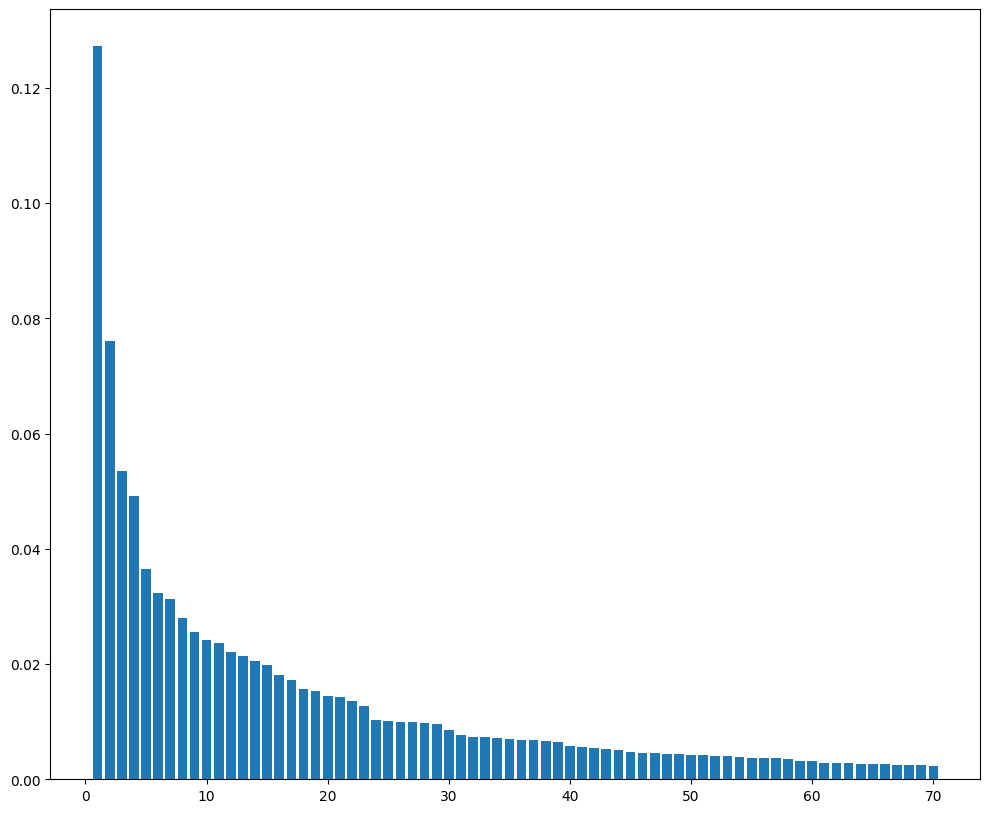

In [56]:
# Step 3 Scree Plot

plt.figure(figsize=(12,10))
plt.bar(range(1, len(pca.explained_variance_ratio_[:70])+1), pca.explained_variance_ratio_[:70])


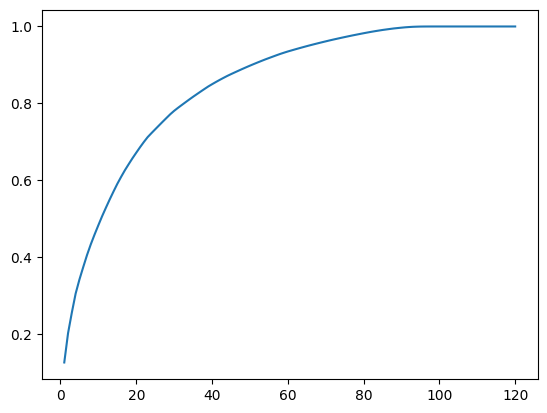

In [57]:
# let's visualize it in terms of cummulative varience
var_cumm = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(var_cumm)+1), var_cumm)

In [58]:
# Step 4: Dimentinality reduction

# As per the scree plot show that first 85 pc explain the varience of around 97% in the data set, hense we choose n_component=85
pca2 = PCA(n_components=85, random_state=42)

X_train_pca_data = pca2.fit_transform(X_train)

X_test_pca_data = pca2.transform(X_test)
X_test_pca_sample = pca2.transform(X_test_sample_scaled)


In [59]:
train_data_pca_cols = ['PC'+str(i) for i in range(1, X_train_pca_data.shape[1]+1)]
test_data_pca_cols = ['PC'+str(i) for i in range(1, X_test_pca_data.shape[1]+1)]
test_sample_pca_cols = ['PC'+str(i) for i in range(1, X_test_pca_sample.shape[1]+1)]

# convert the PCA metrix into DataFrame
X_train_pca_data = pd.DataFrame(X_train_pca_data, columns=train_data_pca_cols)
X_test_pca_data = pd.DataFrame(X_test_pca_data, columns=test_data_pca_cols)
X_test_pca_sample = pd.DataFrame(X_test_pca_sample, columns=test_sample_pca_cols)

In [60]:
# hepler function for: evalution metrix
def model_eval(model_,X_train, X_test, y_train, y_test):
    y_train_pred = model_.predict(X_train)
    y_test_pred = model_.predict(X_test)
    print("Train Set Performance")
    print(f"Accuracy Train: {accuracy_score(y_pred= y_train_pred, y_true=y_train)}")
    print(confusion_matrix(y_train, y_train_pred))
    
    print("--"*30)

    print("Test Set Performance")
    print(f"Accuracy Test: {accuracy_score(y_pred= y_test_pred, y_true=y_test)}")
    print(confusion_matrix(y_test, y_test_pred))

## Step 4: Model Building and Evaluation

### Base Model

In [61]:
base_model = LogisticRegression(max_iter=500)

base_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [62]:
model_eval(base_model, X_train, X_test, y_train, y_test)

Train Set Performance
Accuracy Train: 0.910391256986732
[[49757   536]
 [ 4482  1224]]
------------------------------------------------------------
Test Set Performance
Accuracy Test: 0.9092857142857143
[[12446   128]
 [ 1142   284]]


In [63]:
y_test_pred_sample = base_model.predict(X_test_sample)
y_test_pred_sample_df = pd.DataFrame({'id':test_df.id,'churn_probability': y_test_pred_sample})

# y_test_pred_sample_df.to_csv('sample_v1.csv', index=False)

### Model 1: using PCA

In [64]:
model_1 = LogisticRegression(max_iter=450)

model_1.fit(X_train_pca_data, y_train)

LogisticRegression(max_iter=450)

In [65]:
model_eval(model_1,X_train_pca_data, X_test_pca_data, y_train, y_test )

Train Set Performance
Accuracy Train: 0.9099626779049625
[[49763   530]
 [ 4512  1194]]
------------------------------------------------------------
Test Set Performance
Accuracy Test: 0.9085714285714286
[[12454   120]
 [ 1160   266]]


### Model 2

In [66]:
from sklearn.model_selection import GridSearchCV

model_2 = LogisticRegression()
param = {
    'penalty': ['l2', 'none'],
    'max_iter': [380,500,700],
    'C':[1,2,5,10,15]
}
model_2 = GridSearchCV(model_2,param_grid= param, scoring='accuracy', cv=5, n_jobs=-1)

# fit the model
model_2.fit(X_train_pca_data, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10, 15], 'max_iter': [380, 500, 700],
                         'penalty': ['l2', 'none']},
             scoring='accuracy')

In [67]:
model_eval(model_2, X_train_pca_data, X_test_pca_data, y_train, y_test)

Train Set Performance
Accuracy Train: 0.9099983928284434
[[49761   532]
 [ 4508  1198]]
------------------------------------------------------------
Test Set Performance
Accuracy Test: 0.9085
[[12453   121]
 [ 1160   266]]


### Model 3

In [68]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier(max_depth=7, random_state=42)

# fit the model
model_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [69]:
model_eval(model_3, X_train, X_test, y_train, y_test)

Train Set Performance
Accuracy Train: 0.9470704834014894
[[49195  1098]
 [ 1866  3840]]
------------------------------------------------------------
Test Set Performance
Accuracy Test: 0.9365714285714286
[[12251   323]
 [  565   861]]


### Model 4

In [70]:
param_dt = {
    'max_depth':[4,7,9,15,25],
    'min_samples_leaf': [5,10,12,17,25],
    'min_samples_split': [15,20,25,30],
    'criterion':['gini','entropy']
}

model_4 = DecisionTreeClassifier(random_state=42)
model_4 = GridSearchCV(model_4, param_grid=param_dt, cv=4, n_jobs=-1, scoring='accuracy')

# fit the model
model_4.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 7, 9, 15, 25],
                         'min_samples_leaf': [5, 10, 12, 17, 25],
                         'min_samples_split': [15, 20, 25, 30]},
             scoring='accuracy')

In [71]:
model_eval(model_4, X_train, X_test, y_train, y_test)

Train Set Performance
Accuracy Train: 0.9423382560402864
[[49272  1021]
 [ 2208  3498]]
------------------------------------------------------------
Test Set Performance
Accuracy Test: 0.94
[[12332   242]
 [  598   828]]


### Model 5

In [72]:
from sklearn.ensemble import RandomForestClassifier

model_5 = RandomForestClassifier(max_depth=5, n_estimators=125, min_samples_leaf=20, oob_score=True)

# fit the model
model_5.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=125,
                       oob_score=True)

In [73]:
model_5.oob_score_

0.941766817264594

In [74]:
model_eval(model_5, X_train, X_test, y_train, y_test)

Train Set Performance
Accuracy Train: 0.9423918284255076
[[49247  1046]
 [ 2180  3526]]
------------------------------------------------------------
Test Set Performance
Accuracy Test: 0.9403571428571429
[[12332   242]
 [  593   833]]


In [75]:
y_test_pred_sample = model_5.predict(X_test_sample_scaled)
y_test_pred_sample_df = pd.DataFrame({'id':test_df.id,'churn_probability': y_test_pred_sample})

# y_test_pred_sample_df.to_csv('sample_v3.csv', index=False)

### Model 6

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
model_6 = GradientBoostingClassifier(max_depth=4, n_estimators=170, min_samples_leaf=20,min_samples_split=15)

# fit the model
model_6.fit(X_train_pca_data, y_train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=20,
                           min_samples_split=15, n_estimators=170)

In [77]:
model_eval(model_6, X_train_pca_data, X_test_pca_data, y_train, y_test)

Train Set Performance
Accuracy Train: 0.9440525723673637
[[49487   806]
 [ 2327  3379]]
------------------------------------------------------------
Test Set Performance
Accuracy Test: 0.9204285714285714
[[12257   317]
 [  797   629]]


## Step 5: Model Selection

As we build around 7 different models among them ``Model_5`` gives the best possible result and very robust in terms of predicting the Churn customer.
hense we select the model_5 for ``Churn Prediction`` of ``sample data(unseen data).``

#### Feature Importance

In [103]:
feature_imp_df = pd.DataFrame({'Feature':X_data.columns, 'Importance':model_5.feature_importances_}).sort_values(by='Importance', ascending=False)

feature_imp_df.head()

,Feature,Importance
62,loc_ic_mou_8,0.130007
77,total_ic_mou_8,0.128130
56,loc_ic_t2m_mou_8,0.096974
50,total_og_mou_8,0.088703
26,loc_og_mou_8,0.078728


<AxesSubplot: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

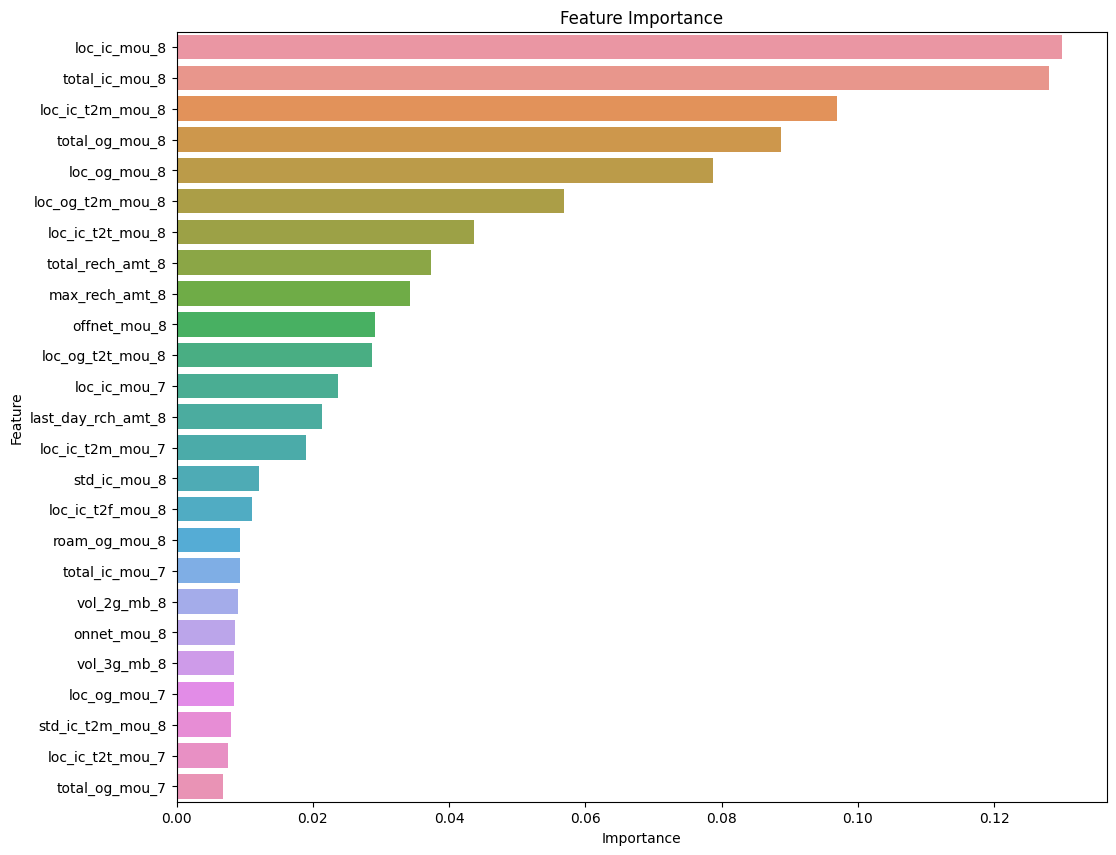

In [111]:
plt.figure(figsize=(12,10))
plt.title('Feature Importance')
sns.barplot(y=feature_imp_df.Feature[:25], x=feature_imp_df.Importance[:25])